<a href="https://colab.research.google.com/github/NikolayZakharevich/itmo-opt-methods/blob/main/lab_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа по методам оптимизации №1

Авторство: Бадяев Вадим (M3437), Захаревич Николай (M3437), Савинов Никита (M3437), Ильина Елена (M3437), Горнак Егор (M3436)

In [ ]:
# imports
from math import sqrt
from scipy.optimize.linesearch import scalar_search_wolfe2
import numpy as np
import scipy as scipy
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

### Пункт 1

Оракул (oracle) - функция для исследования, например f(x) = x * x.


Функция для поиска дихотомии:

In [ ]:
def dichotomy(oracle, a, b, eps, iteration, needInfo=True):
  center = (a + b) / 2
  if abs(a - b) < eps:
      return center, iteration

  delta = eps / 3
  x1 = center - delta
  x2 = center + delta

  y1 = oracle(x1)
  y2 = oracle(x2)

  if y1 < y2:
    if needInfo: print("Отрезок сократился на ", b - x2)
    return dichotomy(oracle, a, x2, eps, iteration + 1, needInfo)
  else:
    if needInfo: print("Отрезок сократился на ", x1 - a)
    return dichotomy(oracle, x1, b, eps, iteration + 1, needInfo)

Функция для поиска золотого сечения:

In [ ]:
# golden section coefficient
phi = 0.5 * (3.0 - sqrt(5.0))
print(phi)

def goldenSection(oracle, a, b, eps, iteration, previousInfo, needInfo=True):
  center = (a + b) / 2
  if abs(a - b) < eps:
    return center, iteration

  if "y2" not in previousInfo:
    x1 = a + (b - a) * phi
    y1 = oracle(x1)
  else:
    x1 = previousInfo["x2"]
    y1 = previousInfo["y2"]

  if "y1" not in previousInfo:
    x2 = b - (b - a) * phi
    y2 = oracle(x2)
  else:
    x2 = previousInfo["x1"]
    y2 = previousInfo["y1"]    

  if y1 < y2:
    if needInfo: print("Отрезок сократился на ", b - x2)
    return goldenSection(oracle, a, x2, eps, iteration + 1, {"x1": x1, "y1": y1}, needInfo)
  else:
    if needInfo: print("Отрезок сократился на ", x1 - a)
    return goldenSection(oracle, x1, b, eps, iteration + 1, {"x2": x2, "y2": y2}, needInfo)

0.3819660112501051


Функция для поиска Фибоначчи:

In [ ]:
def fibonacciMethod(oracle, a, b, iteration, needInfo=True):
  def fibonacci(n):
    fib1 = fib2 = 1
    result = [1, 1]

    for i in range(2, n):
        fib1, fib2 = fib2, fib1 + fib2
        result.append(fib2)

    return result
  
  fibArray = fibonacci(iteration + 1)

  x1 = a + (b - a) * (fibArray[iteration - 2] / fibArray[iteration])
  x2 = a + (b - a) * (fibArray[iteration - 1] / fibArray[iteration])

  y1 = oracle(x1)
  y2 = oracle(x2)

  while iteration > 2:
    iteration -= 1

    if y1 < y2:
      if needInfo: print("Отрезок сократился на ", b - x2)
      b = x2
      x2 = x1
      y2 = y1
      x1 = a + (b - a) * (fibArray[iteration - 2] / fibArray[iteration])
      y1 = oracle(x1)
    else:
      if needInfo: print("Отрезок сократился на ", x1 - a)
      a = x1
      x1 = x2
      y1 = y2
      x2 = a + (b - a) * (fibArray[iteration - 1] / fibArray[iteration])
      y2 = oracle(x2)

  return (x1 + x2) / 2

In [ ]:
def testUnidimensionalSearch():
  def oracle1(x): return x * x
  def oracle2(x): return x * x + 5
  def oracle3(x): return 2 * x * x - x - 2

  epses = [1, 0.1, 0.0001, 0.0000001]
  borders = [[-1000, 1000], [-10, 100000], [-1000, 1]]
  oraclesWithRoot = [[oracle1, 0], [oracle2, 0], [oracle3, 0.25]]
  
  for eps in epses:
    for left, right in borders:
      for oracle, root in oraclesWithRoot:
        x0Dichotomy, _ = dichotomy(oracle, left, right, eps, 1, False)
        x0GS, itCountGS = goldenSection(oracle, left, right, eps, 1, {}, False)
        x0Fibonacci = fibonacciMethod(oracle, left, right, itCountGS, False)

        assert abs(x0Dichotomy - root) < eps
        assert abs(x0GS - root) < eps
        assert abs(x0Fibonacci - root) < eps
  print("Tests correct!")  
    
testUnidimensionalSearch()

Tests correct!


Исследование функции f(x) = x * x с заданными границами интервала -50 и 15000 при точностях 50, 0.1, 0.0001, 0.00000001

In [ ]:
  def oracle(x): return x * x
  epses = [50, 0.1, 0.0001, 0.00000001]
  left = -50
  right = 15000

  for eps in epses:
    print("Dichotomy is executing")
    x0Dichotomy, itCountDichotomy = dichotomy(oracle, left, right, eps, 1)
    print("Golden Section is executing")
    x0GS, itCountGS = goldenSection(oracle, left, right, eps, 1, {})
    print("Fibonacci is executing")
    x0Fibonacci = fibonacciMethod(oracle, left, right, itCountGS)

    print("Eps = ", eps)
    print("Method = Dichotomy | x0 = ", x0Dichotomy, ", iter count = ",
          itCountDichotomy, ", call count = ", itCountDichotomy * 2)
    print("Method = Golden Section | x0 = ", x0GS, ", iter count = ",
          itCountGS, ", call count = ", itCountGS + 1)
    print("Method = Fibonacci | x0 = ", x0Fibonacci, ", iter count = ",
          itCountGS, ", call count = ", itCountGS + 1)

Dichotomy is executing
Отрезок сократился на  7508.333333333333
Отрезок сократился на  3754.166666666667
Отрезок сократился на  1877.0833333333333
Отрезок сократился на  938.5416666666667
Отрезок сократился на  469.2708333333333
Отрезок сократился на  234.63541666666669
Отрезок сократился на  117.31770833333333
Отрезок сократился на  58.65885416666667
Отрезок сократился на  29.329427083333332
Отрезок сократился на  14.664713541666664
Golden Section is executing
Отрезок сократился на  5748.5884693140815
Отрезок сократился на  3552.823061371837
Отрезок сократился на  2195.765407942247
Отрезок сократился на  1357.0576534295878
Отрезок сократился на  838.7077545126599
Отрезок сократился на  518.349898916927
Отрезок сократился на  320.3578555957331
Отрезок сократился на  197.99204332119376
Отрезок сократился на  122.36581227453934
Отрезок сократился на  75.6262310466544
Отрезок сократился на  46.73958122788494
Отрезок сократился на  28.88664981876943
Fibonacci is executing
Отрезок сократилс

### Пункт 2

Заведем Оракула для выпуклой квадратичной функции

In [ ]:
class QuadraticOracle:
    """
    Oracle for quadratic function:
       func(x) = 1/2 x^TAx - b^Tx.
    """

    def __init__(self, A, b):
        if not scipy.sparse.isspmatrix_dia(A) and not np.allclose(A, A.T, rtol=1e-05, atol=1e-08):
            raise ValueError('A should be a symmetric matrix.')
        self.A = A
        self.b = b

    def func(self, x):
        return 0.5 * np.dot(self.A.dot(x), x) - self.b.dot(x)

    def grad(self, x):
        return self.A.dot(x) - self.b

    def hess(self, x):
        return self.A

    def funcDirectional(self, x, d, alpha):
        """
        Computes phi(alpha) = f(x + alpha*d).
        """
        return np.squeeze(self.func(x + alpha * d))

    def gradDirectional(self, x, d, alpha):
        """
        Computes phi'(alpha) = (f(x + alpha*d))'_{alpha}
        """
        return np.squeeze(self.grad(x + alpha * d).dot(d))

Процедура линейного поиска:

In [ ]:
# input (experimented): c = 0.5 (используется для константого метода),
# с1 и с2 используются вместе для метода Вульфа и Армихо, поэтому тут в todo передавать словарь с параметрами для нужного метода и парсить в функции
# alpha_0 исполльзуется для условия Армихо 
# http://www.machinelearning.ru/wiki/images/e/e0/MOMO17_Practice1.pdf
def lineSearch(oracle, x_k, d_k, method, c, c1, c2, alpha_0, previous_alpha=None):
    if method == 'Constant':
        return c
    elif method == 'Division':
        return alpha_
    elif method == 'Armijo':
        alpha = alpha_0 if previous_alpha is None else previous_alpha
        while (oracle.funcDirectional(x_k, d_k, alpha) > oracle.func(
                x_k) + c1 * alpha * oracle.gradDirectional(x_k, d_k, 0)):
            alpha /= 2
        return alpha
    elif method == 'Wolfe':
        phi = lambda x: oracle.funcDirectional(x_k, d_k, x)
        derphi = lambda x: oracle.gradDirectional(x_k, d_k, x)
        phi_0 = phi(0)
        derphi_0 = derphi(0)
        alpha = scalar_search_wolfe2(phi=phi, derphi=derphi,
                                     phi0=phi_0, derphi0=derphi_0,
                                     c1=c1, c2=c2)[0]
        if alpha:
            return alpha
        else:
            return lineSearch(oracle, x_k, d_k, 'Armijo', c, c1, c2, alpha_0, previous_alpha)

Градиентный спуск для квадратичных функций, представленных в виде func(x) = 1/2 x^TAx - b^Tx.

In [ ]:
def gradientDescent(oracle, x_0, method, c0, c1, alpha, tolerance=1e-5, max_iter=1000):
    x_k = x_0
    print(x_k)
    func_x_k = oracle.func(x_k)
    grad_x_k = oracle.grad(x_k)
    a_k = None
    trace = []
    funcRes = []
    grad_x_0_norm = np.linalg.norm(grad_x_k)

    funcRes.append(func_x_k)
    if x_0.size <= 2:
        trace.append(np.copy(x_k))

    for _ in range(max_iter):
        d_k = -grad_x_k
        a_k = lineSearch(oracle, x_k, d_k, method, 0.5, c0, c1, alpha, 2 * a_k if a_k else None)
        x_k += a_k * d_k
        func_x_k = oracle.func(x_k)
        grad_x_k = oracle.grad(x_k)
        grad_x_k_norm = np.linalg.norm(grad_x_k)

        funcRes.append(func_x_k)
        if x_0.size <= 2:
            trace.append(np.copy(x_k))

        if grad_x_k_norm ** 2 <= tolerance * grad_x_0_norm ** 2:
            return x_k, trace, funcRes

    return x_k, trace, funcRes

Пример использования

In [ ]:
oracle = QuadraticOracle(np.eye(5), np.arange(5))
print(gradientDescent(oracle, np.zeros(5)))

0.2 [-0.  1.  2.  3.  4.]
[0.  0.2 0.4 0.6 0.8]
0.4 [-0.   0.8  1.6  2.4  3.2]
[0.   0.52 1.04 1.56 2.08]
0.8 [-0.    0.48  0.96  1.44  1.92]
[0.    0.904 1.808 2.712 3.616]
1.6 [-0.     0.096  0.192  0.288  0.384]
[0.     1.0576 2.1152 3.1728 4.2304]
1.6 [-0.     -0.0576 -0.1152 -0.1728 -0.2304]
[0.      0.96544 1.93088 2.89632 3.86176]
1.6 [-0.       0.03456  0.06912  0.10368  0.13824]
[0.       1.020736 2.041472 3.062208 4.082944]
1.6 [-0.       -0.020736 -0.041472 -0.062208 -0.082944]
[0.        0.9875584 1.9751168 2.9626752 3.9502336]
1.6 [-0.         0.0124416  0.0248832  0.0373248  0.0497664]
[0.         1.00746496 2.01492992 3.02239488 4.02985984]
1.6 [-0.         -0.00746496 -0.01492992 -0.02239488 -0.02985984]
[0.         0.99552102 1.99104205 2.98656307 3.9820841 ]
1.6 [-0.          0.00447898  0.00895795  0.01343693  0.0179159 ]
[0.         1.00268739 2.00537477 3.00806216 4.01074954]
(array([0.        , 1.00268739, 2.00537477, 3.00806216, 4.01074954]), [])


Возьмем в пример две квадратичные функции и построим для них график с линиями уровня и направлением. 


In [ ]:
COLOR_RED = np.linspace(240, 166, 256) / 255.
COLOR_GREEN = np.linspace(244, 188, 256) / 255.
COLOR_BLUE = np.linspace(246, 203, 256) / 255.

In [ ]:
def plotLevels(func):
    xrange = [-6, 6]
    yrange = [-5, 5]
    levels = [0, 0.25, 1, 4, 9, 16, 25]

    x = np.linspace(xrange[0], xrange[1], 100)
    y = np.linspace(yrange[0], yrange[1], 100)
    X, Y = np.meshgrid(x, y)
    Z = np.zeros(X.shape)
    for i in range(Z.shape[0]):
        for j in range(Z.shape[1]):
            Z[i, j] = func(np.array([X[i, j], Y[i, j]]))

    colors = np.vstack([COLOR_RED, COLOR_GREEN, COLOR_BLUE]).T
    my_cmap = ListedColormap(colors)

    _ = plt.contourf(X, Y, Z, levels=levels, cmap=my_cmap)
    CS = plt.contour(X, Y, Z, levels=levels, colors='#ABBECC')
    plt.clabel(CS, inline=1, fontsize=8, colors='#AAAEBB')
    plt.grid()

In [ ]:
def plotTrajectory(trace):
    x_values, y_values = zip(*trace)
    plt.plot(x_values, y_values, '-o', linewidth=1.0, ms=5.0,
             alpha=1.0, c='C2', label="Trajectory")

0.2 [ -6.  -13.5]
[ 1.8 -1.2]
0.2 [0.6 2.4]
[ 1.92 -0.72]
0.4 [-0.48 -0.24]
[ 1.728 -0.816]
0.4 [-0.096  0.624]
[ 1.6896 -0.5664]
0.2 [-0.5568 -0.5472]
[ 1.57824 -0.67584]
0.4 [-0.22656  0.22272]
[ 1.487616 -0.586752]
0.8 [-0.314112 -0.041472]
[ 1.2363264 -0.6199296]
0.2 [0.0035328 0.6269952]
[ 1.23703296 -0.49453056]
0.4 [-0.24797184 -0.00141312]
[ 1.13784422 -0.49509581]
0.8 [-0.14765261  0.19979059]
[ 1.01972214 -0.33526333]
0.2 [-0.34919547 -0.3631276 ]
[ 0.94988304 -0.40788886]
0.4 [-0.13410533  0.13967819]
[ 0.89624091 -0.35201758]
0.8 [-0.19220575 -0.03239392]
[ 0.74247631 -0.37793272]
0.2 [0.01338912 0.40471096]
[ 0.74515413 -0.29699052]
0.4 [-0.15117309 -0.00535565]
[ 0.6846849  -0.29913278]
0.8 [-0.08641933  0.12629412]
[ 0.61554943 -0.19809749]
0.2 [-0.21935446 -0.24061142]
[ 0.57167854 -0.24621977]
0.4 [-0.079239    0.08774178]
[ 0.53998294 -0.21112306]
0.8 [-0.11773682 -0.02435059]
[ 0.44579349 -0.23060353]
0.2 [0.01541357 0.26143067]
[ 0.4488762  -0.17831739]
0.4 [-0.0922

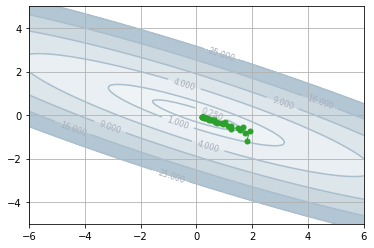

In [ ]:
# todo:: задать конкретный элипс и гиперболу, например
# oracle = QuadraticOracle(np.array([[3.0, 2.0, 0.0], [2.0, -2.0, 1.0], [0.0, 1.0, -1.0]]), np.zeros(3))
# grd, trace = gradientDescent(oracle, np.array([1.0, 2.0, 3.0]))
oracle = QuadraticOracle(np.array([[1.0, 2.0], [2.0, 5.0]]), np.zeros(2))
    grd, trace, funcs = gradientDescent(oracle, np.array([3.0, 1.5]), 'Armijo', 0.1, 0.1, 0.2)
    print(grd, trace)
    plot_levels(oracle.func)
    plotTrajectory(trace)
    plt.show()

### Пункт 4

In [ ]:
def point41():
    # размерности
    ns = [10, 100, 1000]
    colors = ['r', 'g', 'b', 'm']
    # числа обусловенности
    kappas = list(range(1, 1000, 100))
    # число сэмплов
    number_of_samples = 5
    T = {}
    for n, color in zip(ns, colors):
        T[n] = [[] for _ in range(number_of_samples)]
        for i in range(number_of_samples):
            for kappa in kappas:
                np.random.seed(i)
                diag = np.random.uniform(low=1, high=kappa, size=n)
                diag[0], diag[-1] = 1, kappa
                A = diags(diag)
                A = A.toarray()
                b = np.random.uniform(low=1, high=kappa, size=n)
                oracle = QuadraticOracle(A, b)
                _, _, funcs = gradientDescent(oracle, np.zeros(n), 'Armijo', 0.1, 0.1, 0.2)
                T[n][i].append(len(funcs))
            plt.plot(kappas, T[n][i], color=color, alpha=0.3, linestyle = '-.')
        plt.plot(kappas, np.mean(T[n], axis=0), color=color, label='n = {}'.format(n))
    plt.legend()
    plt.grid()
    plt.ylabel('Количество итераций $N(n, \kappa)$')
    plt.xlabel('Число обусловленности целевой функции $\kappa$')